# Tables Concatenation

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
df_prep = pd.read_csv('Teachers_data.csv', sep=';', decimal=',', dtype= {'prep_email': 'string'}) 
df_from_DB = pd.read_csv('SQL_data.csv', sep=';', dtype= {'group_title': 'string', 'prep_email': 'string', 'feat_payment_type': 'string', 'feat_payment_place': 'string'})

In [33]:
df = pd.merge(df_from_DB, df_prep, on='prep_email', how='left')

In [34]:
df

,student_id,student_email,group_id,group_title,prep_email,date_first_l,feat_group_size,feat_attendance,feat_HW,feat_HW_right,...,feat_tickets_mb_term,feat_payment_type,feat_payment_place,feat_term_perc,feat_good_agr_before,target,feat_prep_attendence,feat_prep_HW,feat_prep_SIM,feat_prep_OpenLessons
0,10413178,vari.belyaeva.sed001@mail.ru,67865,ege_10_bl+onl-group_mat_std_paid_int_17w_33l_0...,alina.devyatyarova@maximumtest.ru,2024-02-02 21:00:00,7,1.00,0.790759,0.732470,...,0,Единовременная,ИK,27.651515,1,0,NaN,NaN,NaN,NaN
1,258482,polinakitty14@gmail.com,67865,ege_10_bl+onl-group_mat_std_paid_int_17w_33l_0...,alina.devyatyarova@maximumtest.ru,2024-02-02 21:00:00,7,0.43,0.472222,0.404222,...,0,Единовременная,ИK,34.426230,1,1,NaN,NaN,NaN,NaN
2,9051803,dashahivrich2007@gmail.com,67865,ege_10_bl+onl-group_mat_std_paid_int_17w_33l_0...,alina.devyatyarova@maximumtest.ru,2024-02-02 21:00:00,7,1.00,0.253038,0.239595,...,0,Позтапная,ИK,25.925926,1,0,NaN,NaN,NaN,NaN
3,10407927,nastya.klimova07@gmail.com,67865,ege_10_bl+onl-group_mat_std_paid_int_17w_33l_0...,alina.devyatyarova@maximumtest.ru,2024-02-02 21:00:00,7,1.00,0.813291,0.651681,...,0,Единовременная,ИK,34.426230,1,0,NaN,NaN,NaN,NaN
4,10446296,danilpyatunin290802@gmail.com,67865,ege_10_bl+onl-group_mat_std_paid_int_17w_33l_0...,alina.devyatyarova@maximumtest.ru,2024-02-02 21:00:00,7,1.00,0.241139,0.205468,...,0,Материнский капитал,ИK,20.276498,1,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67419,887408,lebedevavarvara0405@gmail.com,28767,oge_ru_9_onl_mini_soc_normal_std_paid_opt_21w_...,evgeniya.oshurkova@maximumtest.ru,2021-12-19 13:00:00,11,0.90,0.261207,0.215809,...,0,Единовременная,ИK,28.528226,1,0,NaN,0.934167,NaN,5.0
67420,318412,igoryapas@gmail.com,28767,oge_ru_9_onl_mini_soc_normal_std_paid_opt_21w_...,evgeniya.oshurkova@maximumtest.ru,2021-12-19 13:00:00,11,0.95,0.417586,0.357788,...,0,Материнский капитал,ИK,15.154749,1,0,NaN,0.934167,NaN,5.0
67421,312518,sonikuzmina@yandex.ru,28767,oge_ru_9_onl_mini_soc_normal_std_paid_opt_21w_...,evgeniya.oshurkova@maximumtest.ru,2021-12-19 13:00:00,11,1.00,0.651552,0.532472,...,0,Единовременная,ИK,15.047022,1,0,NaN,0.934167,NaN,5.0
67422,9358671,surovaaarina@gmail.com,28767,oge_ru_9_onl_mini_soc_normal_std_paid_opt_21w_...,evgeniya.oshurkova@maximumtest.ru,2021-12-19 13:00:00,11,1.00,0.815000,0.560593,...,0,Единовременная,ИK,19.560878,1,0,NaN,0.934167,NaN,5.0


## Data Engineering

In [35]:
def init_class(group_code):
    for N_class in ['11', '10', '9', '8']:
        if N_class in group_code[:15]:
            return int(N_class)
    pass

class_column = df['group_title'].apply(init_class)
df.insert(loc=6, column='feat_class', value=class_column)

def init_group_format(group_code):
    code_to_format = {'mini':'Мини', 'bl':'Блендед', 'class': 'Блендед','onl+':'Стандарт', 'micro':'Микро', 'onl':'Мини', 'maximum': 'Микро', 'k+o':'Онлайн+Класс', 'o+k':'Онлайн+Класс'}
    for format_code, format_title in code_to_format.items():
        if format_code in group_code:
            return format_title
    pass

feat_group_format = df['group_title'].apply(init_group_format)
df.insert(loc=7, column='feat_group_format', value=feat_group_format)

def init_group_length(group_code):
    pos = group_code.rfind('w_', 0, -10)
    group_length = group_code[pos-2:pos].replace('_', '')
    return int(group_length)

feat_group_length = df['group_title'].apply(init_group_length)
df.insert(loc=8, column='feat_group_weeks', value=feat_group_length)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67424 entries, 0 to 67423
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   student_id             67424 non-null  int64  
 1   student_email          67424 non-null  object 
 2   group_id               67424 non-null  int64  
 3   group_title            67424 non-null  string 
 4   prep_email             67338 non-null  string 
 5   date_first_l           67424 non-null  object 
 6   feat_class             67424 non-null  int64  
 7   feat_group_format      67424 non-null  object 
 8   feat_group_weeks       67424 non-null  int64  
 9   feat_group_size        67424 non-null  int64  
 10  feat_attendance        67424 non-null  float64
 11  feat_HW                67424 non-null  float64
 12  feat_HW_right          67424 non-null  float64
 13  feat_theory_read       67424 non-null  float64
 14  feat_TK                67424 non-null  float64
 15  fe

# Data Reading

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67424 entries, 0 to 67423
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   student_id             67424 non-null  int64  
 1   student_email          67424 non-null  object 
 2   group_id               67424 non-null  int64  
 3   group_title            67424 non-null  string 
 4   prep_email             67338 non-null  string 
 5   date_first_l           67424 non-null  object 
 6   feat_class             67424 non-null  int64  
 7   feat_group_format      67424 non-null  object 
 8   feat_group_weeks       67424 non-null  int64  
 9   feat_group_size        67424 non-null  int64  
 10  feat_attendance        67424 non-null  float64
 11  feat_HW                67424 non-null  float64
 12  feat_HW_right          67424 non-null  float64
 13  feat_theory_read       67424 non-null  float64
 14  feat_TK                67424 non-null  float64
 15  fe

In [38]:
df.describe()

,student_id,group_id,feat_class,feat_group_weeks,feat_group_size,feat_attendance,feat_HW,feat_HW_right,feat_theory_read,feat_TK,...,feat_LB,feat_tickets_we_need,feat_tickets_mb_term,feat_term_perc,feat_good_agr_before,target,feat_prep_attendence,feat_prep_HW,feat_prep_SIM,feat_prep_OpenLessons
count,6.742400e+04,67424.000000,67424.000000,67424.000000,67424.000000,67424.000000,67424.000000,67424.000000,67424.000000,67424.000000,...,67424.000000,67424.000000,67424.000000,67416.000000,67424.000000,67424.000000,63717.000000,64108.000000,35096.000000,63946.000000
mean,5.814216e+06,40162.848496,10.249051,29.341125,21.884285,0.887201,0.618203,0.486869,0.438053,0.540027,...,2.826026,0.353539,0.023137,17.715962,0.938953,0.134255,0.929856,0.737299,84.527329,4.658664
std,4.485203e+06,13697.133405,0.903514,6.641241,25.405121,0.208320,0.299308,0.257447,0.320609,0.308159,...,1.982149,1.173875,0.204437,6.716080,0.239417,0.340928,0.038568,0.104894,13.161238,0.723980
min,2.742000e+03,13917.000000,9.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.620000,0.000000,0.000000,0.000000
25%,3.075350e+05,28157.000000,9.000000,29.000000,12.000000,0.880000,0.400833,0.291110,0.150000,0.290000,...,1.000000,0.000000,0.000000,13.471503,1.000000,0.000000,0.907911,0.673280,80.000000,4.111667
50%,8.998848e+06,36766.000000,11.000000,33.000000,16.000000,0.980000,0.677650,0.511856,0.390000,0.530000,...,3.000000,0.000000,0.000000,17.254902,1.000000,0.000000,0.933767,0.749359,87.500000,4.667500
75%,9.621949e+06,51728.000000,11.000000,33.000000,20.000000,1.000000,0.877080,0.695876,0.710000,0.800000,...,5.000000,0.000000,0.000000,22.236663,1.000000,0.000000,0.958333,0.809685,93.000000,5.056667
max,1.142207e+07,72244.000000,11.000000,35.000000,194.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,27.000000,24.000000,7.000000,100.000000,1.000000,1.000000,1.000000,1.000000,100.000000,6.000000


# Data Cleaning / Data Preprocessing

## Handling Missing Values

NaN значения в столбце: prep_email - 0.13% - string
NaN значения в столбце: feat_TK_right - 65.83% - float64
NaN значения в столбце: feat_payment_place - 0.42% - string
NaN значения в столбце: feat_term_perc - 0.01% - float64
NaN значения в столбце: feat_prep_attendence - 5.5% - float64
NaN значения в столбце: feat_prep_HW - 4.92% - float64
NaN значения в столбце: feat_prep_SIM - 47.95% - float64
NaN значения в столбце: feat_prep_OpenLessons - 5.16% - float64


<Axes: >

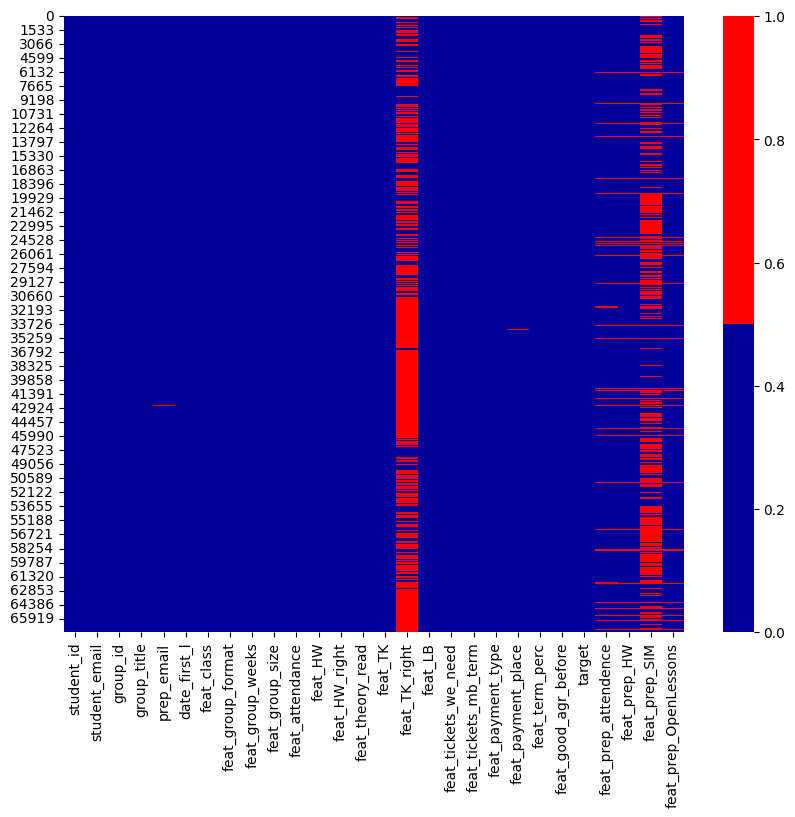

In [39]:
for col in df.columns:
  pct_missing = np.mean(df[col].isnull())
  if pct_missing != 0:
    print('NaN значения в столбце: {} - {}% - {}'.format(col, round(pct_missing*100, 2), df[col].dtype))

plt.figure(figsize=(10, 8))
colours = ['#000099', '#ff0000']
sns.heatmap(df.isnull(), cmap=sns.color_palette(colours))

1. *drop* for NaN feat_TK_right (NaN > 50%)
2. *drop* for NaN feat_perp_SIM (NaN > 40%)
3. *mode* for NaN feat_payment_place (categorical feature)
4. *mean* for NaN feat_term_perc
5. *mean* for NaN feat_prep_OpenLessons
6. *mean* for NaN feat_prep_HW
7. *mean* for NaN feat_prep_attendence
8. *dropna* for NaN prep_email (86 rows)

In [40]:
df.drop('feat_TK_right', axis=1, inplace=True)
df.drop('feat_prep_SIM', axis=1, inplace=True)
df['feat_payment_place'] = df['feat_payment_place'].fillna('ИК')
df['feat_term_perc'] = df['feat_term_perc'].fillna(df['feat_term_perc'].mean())
df['feat_prep_OpenLessons'] = df['feat_prep_OpenLessons'].fillna(df['feat_prep_OpenLessons'].mean())
df['feat_prep_HW'] = df['feat_prep_HW'].fillna(df['feat_prep_HW'].mean())
df['feat_prep_attendence'] = df['feat_prep_attendence'].fillna(df['feat_prep_attendence'].mean())
df.dropna(subset='prep_email', inplace=True)
df.isnull().sum()
df

,student_id,student_email,group_id,group_title,prep_email,date_first_l,feat_class,feat_group_format,feat_group_weeks,feat_group_size,...,feat_tickets_we_need,feat_tickets_mb_term,feat_payment_type,feat_payment_place,feat_term_perc,feat_good_agr_before,target,feat_prep_attendence,feat_prep_HW,feat_prep_OpenLessons
0,10413178,vari.belyaeva.sed001@mail.ru,67865,ege_10_bl+onl-group_mat_std_paid_int_17w_33l_0...,alina.devyatyarova@maximumtest.ru,2024-02-02 21:00:00,10,Блендед,17,7,...,0,0,Единовременная,ИK,27.651515,1,0,0.929856,0.737299,4.658664
1,258482,polinakitty14@gmail.com,67865,ege_10_bl+onl-group_mat_std_paid_int_17w_33l_0...,alina.devyatyarova@maximumtest.ru,2024-02-02 21:00:00,10,Блендед,17,7,...,0,0,Единовременная,ИK,34.426230,1,1,0.929856,0.737299,4.658664
2,9051803,dashahivrich2007@gmail.com,67865,ege_10_bl+onl-group_mat_std_paid_int_17w_33l_0...,alina.devyatyarova@maximumtest.ru,2024-02-02 21:00:00,10,Блендед,17,7,...,3,0,Позтапная,ИK,25.925926,1,0,0.929856,0.737299,4.658664
3,10407927,nastya.klimova07@gmail.com,67865,ege_10_bl+onl-group_mat_std_paid_int_17w_33l_0...,alina.devyatyarova@maximumtest.ru,2024-02-02 21:00:00,10,Блендед,17,7,...,1,0,Единовременная,ИK,34.426230,1,0,0.929856,0.737299,4.658664
4,10446296,danilpyatunin290802@gmail.com,67865,ege_10_bl+onl-group_mat_std_paid_int_17w_33l_0...,alina.devyatyarova@maximumtest.ru,2024-02-02 21:00:00,10,Блендед,17,7,...,3,0,Материнский капитал,ИK,20.276498,1,0,0.929856,0.737299,4.658664
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67419,887408,lebedevavarvara0405@gmail.com,28767,oge_ru_9_onl_mini_soc_normal_std_paid_opt_21w_...,evgeniya.oshurkova@maximumtest.ru,2021-12-19 13:00:00,9,Мини,21,11,...,0,0,Единовременная,ИK,28.528226,1,0,0.929856,0.934167,5.000000
67420,318412,igoryapas@gmail.com,28767,oge_ru_9_onl_mini_soc_normal_std_paid_opt_21w_...,evgeniya.oshurkova@maximumtest.ru,2021-12-19 13:00:00,9,Мини,21,11,...,0,0,Материнский капитал,ИK,15.154749,1,0,0.929856,0.934167,5.000000
67421,312518,sonikuzmina@yandex.ru,28767,oge_ru_9_onl_mini_soc_normal_std_paid_opt_21w_...,evgeniya.oshurkova@maximumtest.ru,2021-12-19 13:00:00,9,Мини,21,11,...,0,0,Единовременная,ИK,15.047022,1,0,0.929856,0.934167,5.000000
67422,9358671,surovaaarina@gmail.com,28767,oge_ru_9_onl_mini_soc_normal_std_paid_opt_21w_...,evgeniya.oshurkova@maximumtest.ru,2021-12-19 13:00:00,9,Мини,21,11,...,0,0,Единовременная,ИK,19.560878,1,0,0.929856,0.934167,5.000000


In [41]:
df.to_csv('Clean_Data.csv', index=False, sep=';')

## Exploratory Data Analysis

In [42]:
df_target_true = df[df['target'] == 1] # df with term
df_target_false = df[df['target'] == 0] # df without term
df_numerical = df.select_dtypes(include=['number']) 
df_numerical = df_numerical.drop(columns=['student_id', 'group_id']) # df with numerical 
df_categ = df.select_dtypes(include=['string', 'object'])  # df without category

Text(0.5, 1.0, 'Prep OpenLessons')

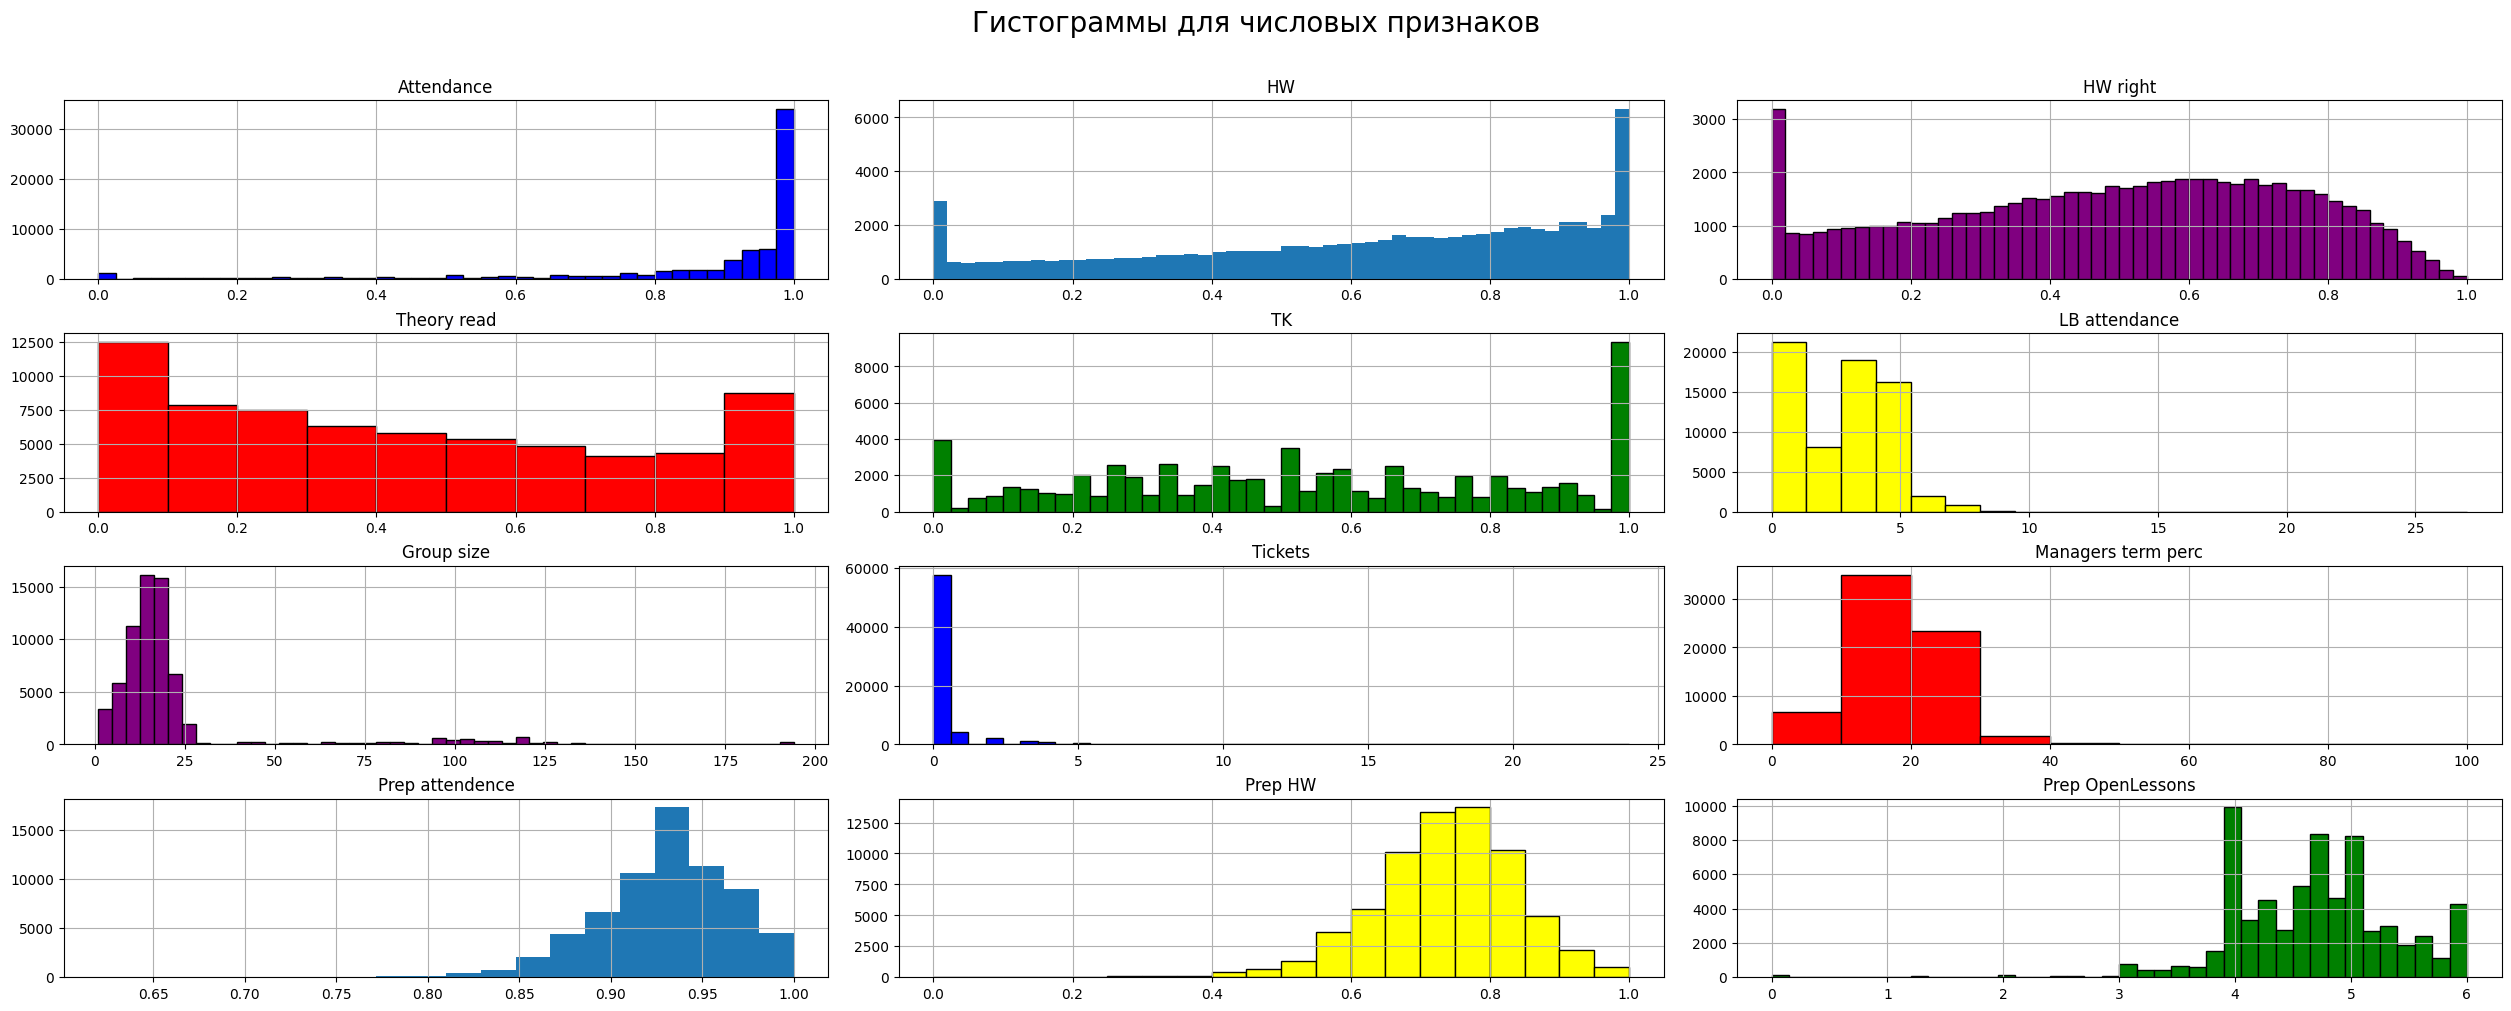

In [43]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(25, 10), constrained_layout=True) 
plt.suptitle('Гистограммы для числовых признаков\n', fontsize=20)

df_numerical['feat_attendance'].hist(ax=axes[0, 0], bins=40, color='blue', edgecolor='black')
df_numerical['feat_HW'].hist(ax=axes[0, 1], bins=50)
df_numerical['feat_HW_right'].hist(ax=axes[0, 2], bins=50, color='purple', edgecolor='black')
df_numerical['feat_theory_read'].hist(ax=axes[1,0], bins=10, color='red', edgecolor='black')
df_numerical['feat_TK'].hist(ax=axes[1,1], bins=40, color='green', edgecolor='black')
df_numerical['feat_LB'].hist(ax=axes[1,2], bins=20, color='yellow', edgecolor='black')
df_numerical['feat_group_size'].hist(ax=axes[2, 0], bins=50, color='purple', edgecolor='black')
df_numerical['feat_tickets_we_need'].hist(ax=axes[2, 1], bins=40, color='blue', edgecolor='black')
df_numerical['feat_term_perc'].hist(ax=axes[2,2], bins=10, color='red', edgecolor='black')
df_numerical['feat_prep_attendence'].hist(ax=axes[3, 0], bins=20)
df_numerical['feat_prep_HW'].hist(ax=axes[3,1], bins=20, color='yellow', edgecolor='black')
df_numerical['feat_prep_OpenLessons'].hist(ax=axes[3,2], bins=40, color='green', edgecolor='black')

axes[0, 0].set_title('Attendance')
axes[0, 1].set_title('HW')
axes[0, 2].set_title('HW right')
axes[1, 0].set_title('Theory read')
axes[1, 1].set_title('TK')
axes[1, 2].set_title('LB attendance')
axes[2, 0].set_title('Group size')
axes[2, 1].set_title('Tickets')
axes[2, 2].set_title('Managers term perc')
axes[3, 0].set_title('Prep attendence')
axes[3, 1].set_title('Prep HW')
axes[3, 2].set_title('Prep OpenLessons')

Text(0.5, 1.0, 'Prep OpenLessons')

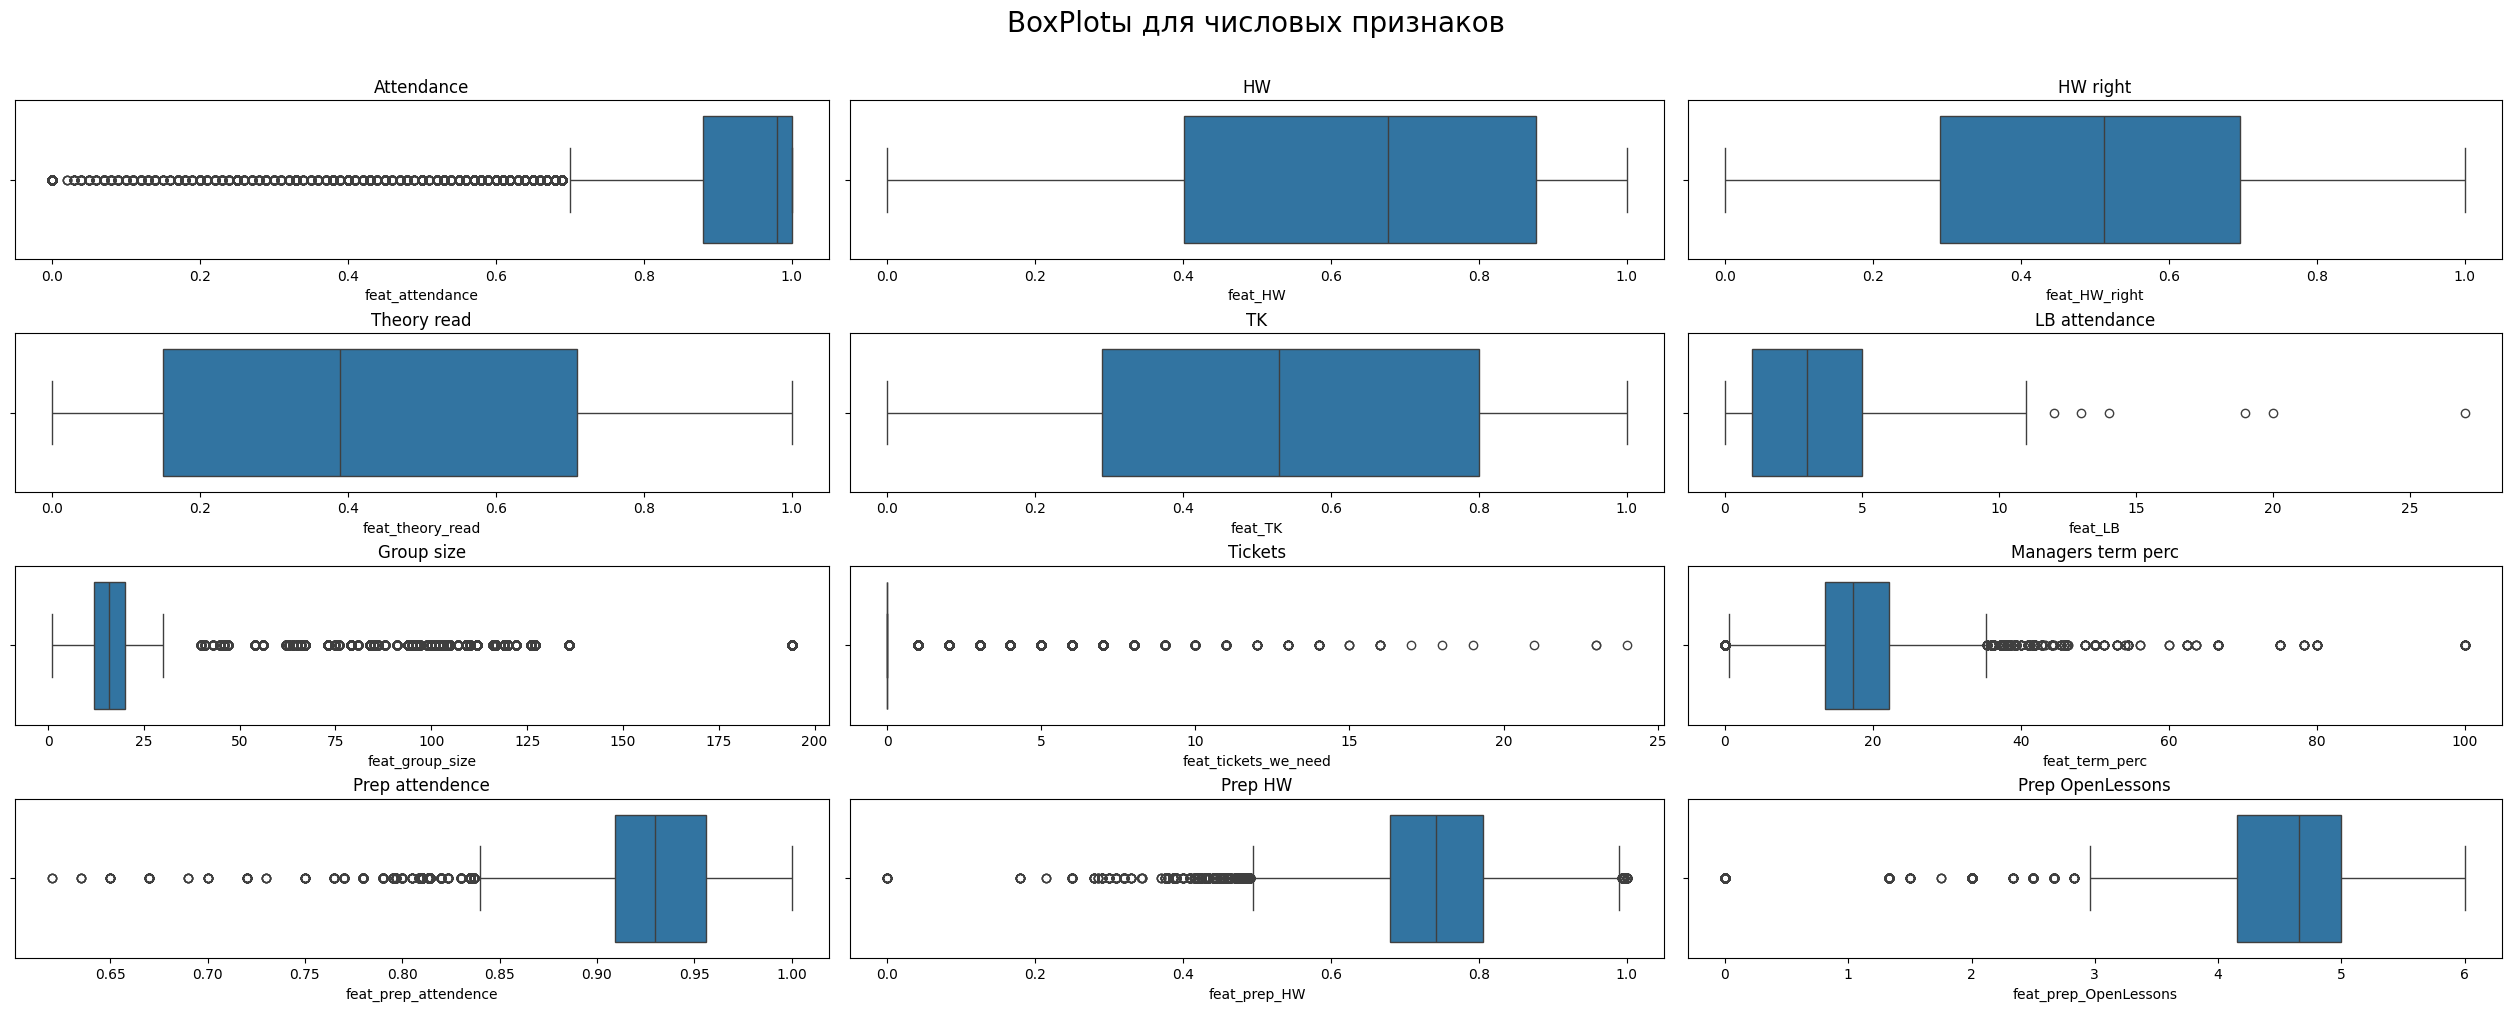

In [44]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(25, 10), constrained_layout=True)
plt.suptitle('BoxPlotы для числовых признаков\n', fontsize=20)

sns.boxplot(df_numerical['feat_attendance'], ax=axes[0, 0], orient='h')
sns.boxplot(df_numerical['feat_HW'], ax=axes[0, 1], orient='h')
sns.boxplot(df_numerical['feat_HW_right'], ax=axes[0, 2], orient='h')
sns.boxplot(df_numerical['feat_theory_read'], ax=axes[1, 0], orient='h')
sns.boxplot(df_numerical['feat_TK'], ax=axes[1, 1], orient='h')
sns.boxplot(df_numerical['feat_LB'], ax=axes[1, 2], orient='h')
sns.boxplot(df_numerical['feat_group_size'], ax=axes[2,0], orient='h')
sns.boxplot(df_numerical['feat_tickets_we_need'], ax=axes[2,1], orient='h')
sns.boxplot(df_numerical['feat_term_perc'], ax=axes[2,2], orient='h')
sns.boxplot(df_numerical['feat_prep_attendence'], ax=axes[3,0], orient='h')
sns.boxplot(df_numerical['feat_prep_HW'], ax=axes[3,1], orient='h')
sns.boxplot(df_numerical['feat_prep_OpenLessons'], ax=axes[3,2], orient='h')

axes[0, 0].set_title('Attendance')
axes[0, 1].set_title('HW')
axes[0, 2].set_title('HW right')
axes[1, 0].set_title('Theory read')
axes[1, 1].set_title('TK')
axes[1, 2].set_title('LB attendance')
axes[2, 0].set_title('Group size')
axes[2, 1].set_title('Tickets')
axes[2, 2].set_title('Managers term perc')
axes[3, 0].set_title('Prep attendence')
axes[3, 1].set_title('Prep HW')
axes[3, 2].set_title('Prep OpenLessons')

## Target data comparison 

Text(0.5, 1.0, 'Prep OpenLessons term')

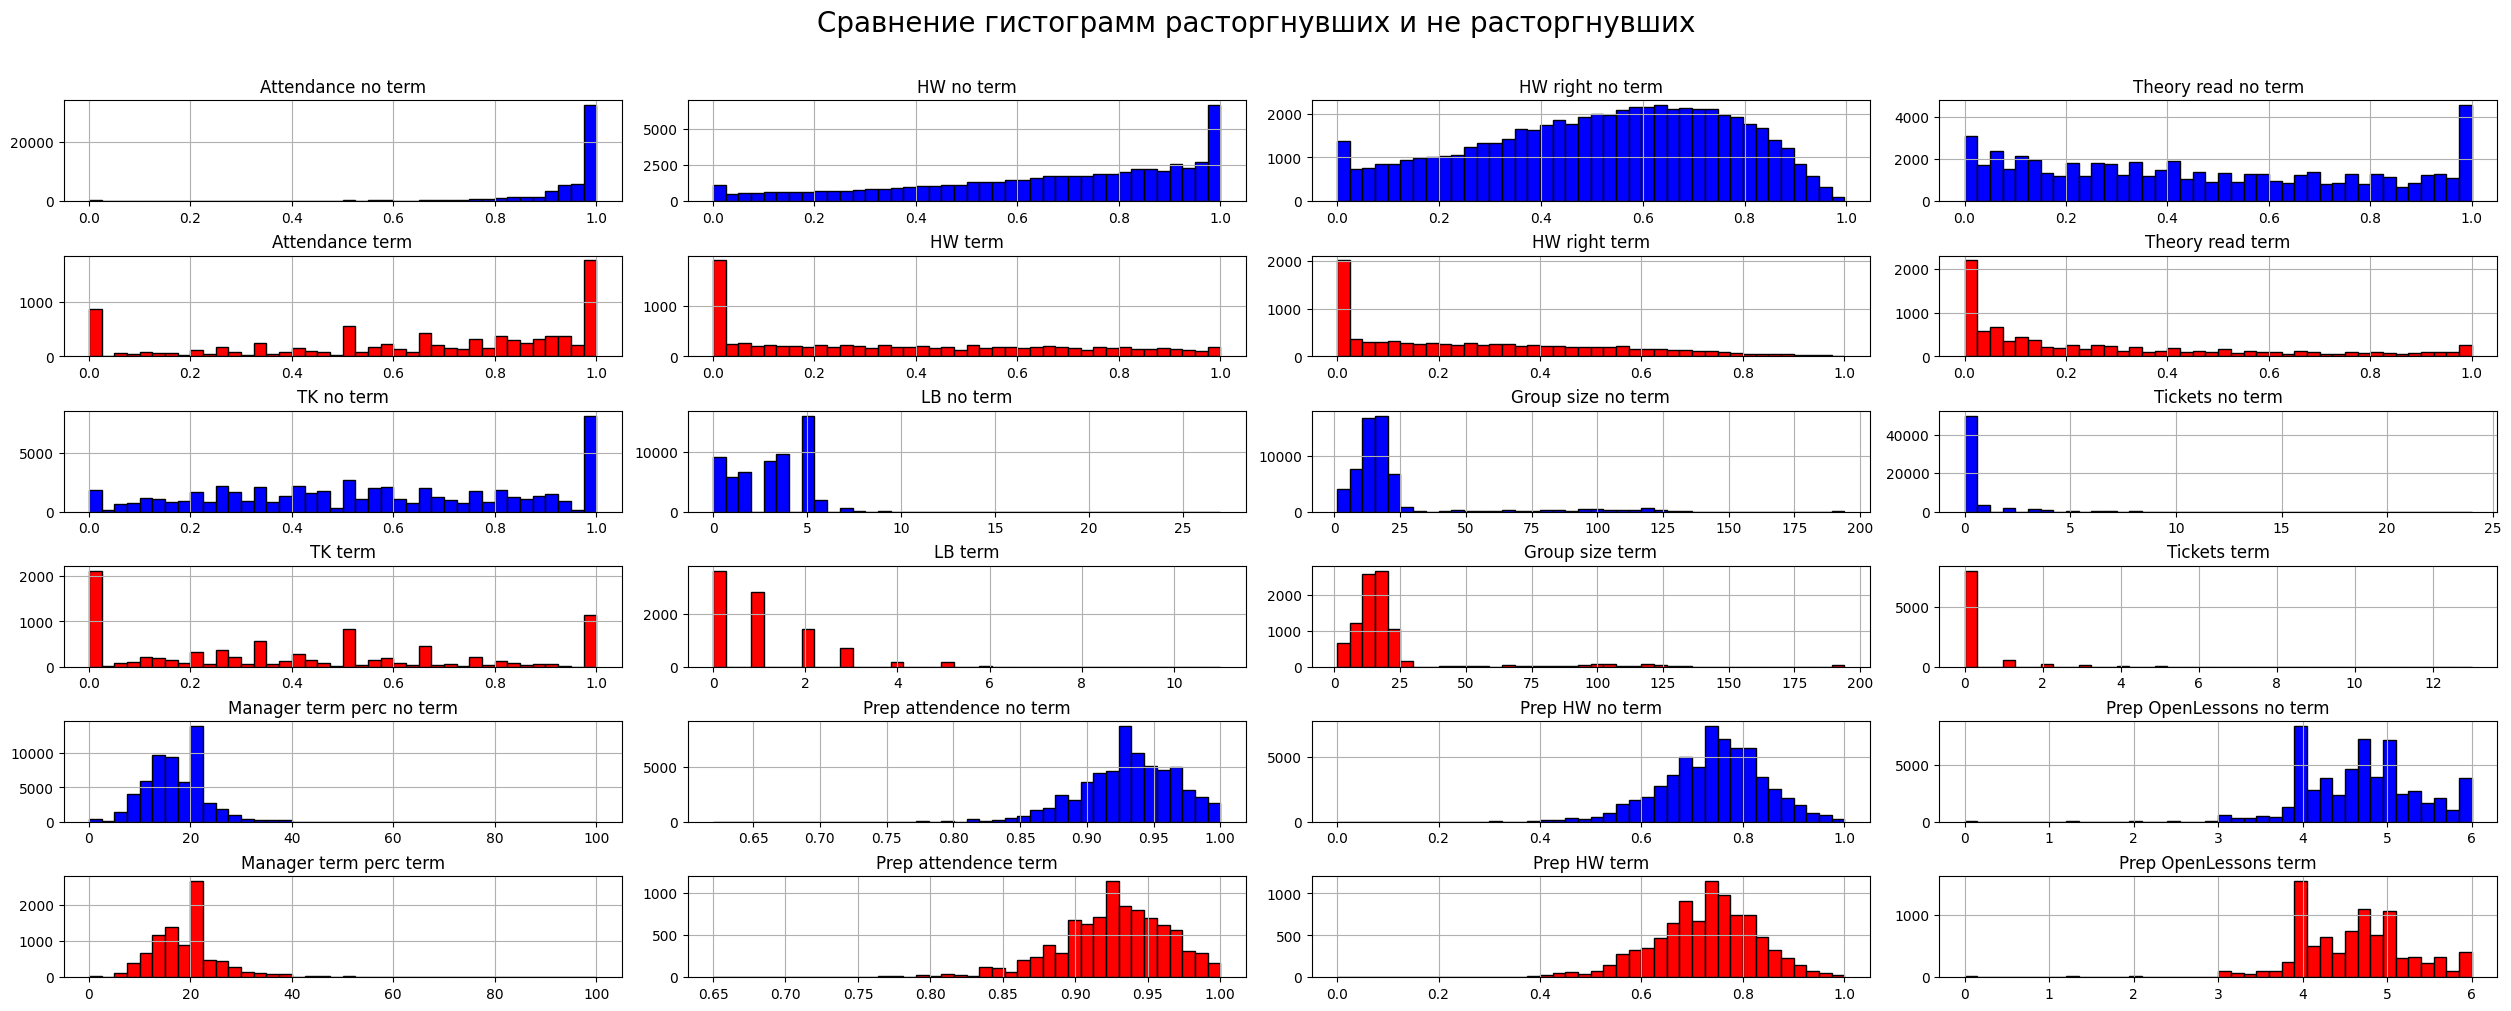

In [45]:
fig, axes = plt.subplots(nrows=6, ncols=4, figsize=(25, 10), constrained_layout=True) 
plt.suptitle('Сравнение гистограмм расторгнувших и не расторгнувших\n', fontsize=20)

df_target_false['feat_attendance'].hist(ax=axes[0, 0], bins=40, color='blue', edgecolor='black')
df_target_true['feat_attendance'].hist(ax=axes[1, 0], bins=40, color='red', edgecolor='black')
df_target_false['feat_HW'].hist(ax=axes[0, 1], bins=40, color='blue', edgecolor='black')
df_target_true['feat_HW'].hist(ax=axes[1, 1], bins=40, color='red', edgecolor='black')
df_target_false['feat_HW_right'].hist(ax=axes[0, 2], bins=40, color='blue', edgecolor='black')
df_target_true['feat_HW_right'].hist(ax=axes[1, 2], bins=40, color='red', edgecolor='black')
df_target_false['feat_theory_read'].hist(ax=axes[0,3], bins=40, color='blue', edgecolor='black')
df_target_true['feat_theory_read'].hist(ax=axes[1,3], bins=40, color='red', edgecolor='black')
df_target_false['feat_TK'].hist(ax=axes[2,0], bins=40, color='blue', edgecolor='black')
df_target_true['feat_TK'].hist(ax=axes[3,0], bins=40, color='red', edgecolor='black')
df_target_false['feat_LB'].hist(ax=axes[2,1], bins=40, color='blue', edgecolor='black')
df_target_true['feat_LB'].hist(ax=axes[3,1], bins=40, color='red', edgecolor='black')
df_target_false['feat_group_size'].hist(ax=axes[2,2], bins=40, color='blue', edgecolor='black')
df_target_true['feat_group_size'].hist(ax=axes[3,2], bins=40, color='red', edgecolor='black')
df_target_false['feat_tickets_we_need'].hist(ax=axes[2,3], bins=40, color='blue', edgecolor='black')
df_target_true['feat_tickets_we_need'].hist(ax=axes[3,3], bins=40, color='red', edgecolor='black')
df_target_false['feat_term_perc'].hist(ax=axes[4,0], bins=40, color='blue', edgecolor='black')
df_target_true['feat_term_perc'].hist(ax=axes[5,0], bins=40, color='red', edgecolor='black')
df_target_false['feat_prep_attendence'].hist(ax=axes[4,1], bins=40, color='blue', edgecolor='black')
df_target_true['feat_prep_attendence'].hist(ax=axes[5,1], bins=40, color='red', edgecolor='black')
df_target_false['feat_prep_HW'].hist(ax=axes[4,2], bins=40, color='blue', edgecolor='black')
df_target_true['feat_prep_HW'].hist(ax=axes[5,2], bins=40, color='red', edgecolor='black')
df_target_false['feat_prep_OpenLessons'].hist(ax=axes[4,3], bins=40, color='blue', edgecolor='black')
df_target_true['feat_prep_OpenLessons'].hist(ax=axes[5,3], bins=40, color='red', edgecolor='black')

axes[0, 0].set_title('Attendance no term')
axes[1, 0].set_title('Attendance term')
axes[0, 1].set_title('HW no term')
axes[1, 1].set_title('HW term')
axes[0, 2].set_title('HW right no term')
axes[1, 2].set_title('HW right term')
axes[0, 3].set_title('Theory read no term')
axes[1, 3].set_title('Theory read term')
axes[2, 0].set_title('TK no term')
axes[3, 0].set_title('TK term')
axes[2, 1].set_title('LB no term')
axes[3, 1].set_title('LB term')
axes[2, 2].set_title('Group size no term')
axes[3, 2].set_title('Group size term')
axes[2, 3].set_title('Tickets no term')
axes[3, 3].set_title('Tickets term')
axes[4, 0].set_title('Manager term perc no term')
axes[5, 0].set_title('Manager term perc term')
axes[4, 1].set_title('Prep attendence no term')
axes[5, 1].set_title('Prep attendence term')
axes[4, 2].set_title('Prep HW no term')
axes[5, 2].set_title('Prep HW term')
axes[4, 3].set_title('Prep OpenLessons no term')
axes[5, 3].set_title('Prep OpenLessons term')

# Feature Selection

In [46]:
df_numerical_corr = df_numerical.corr()

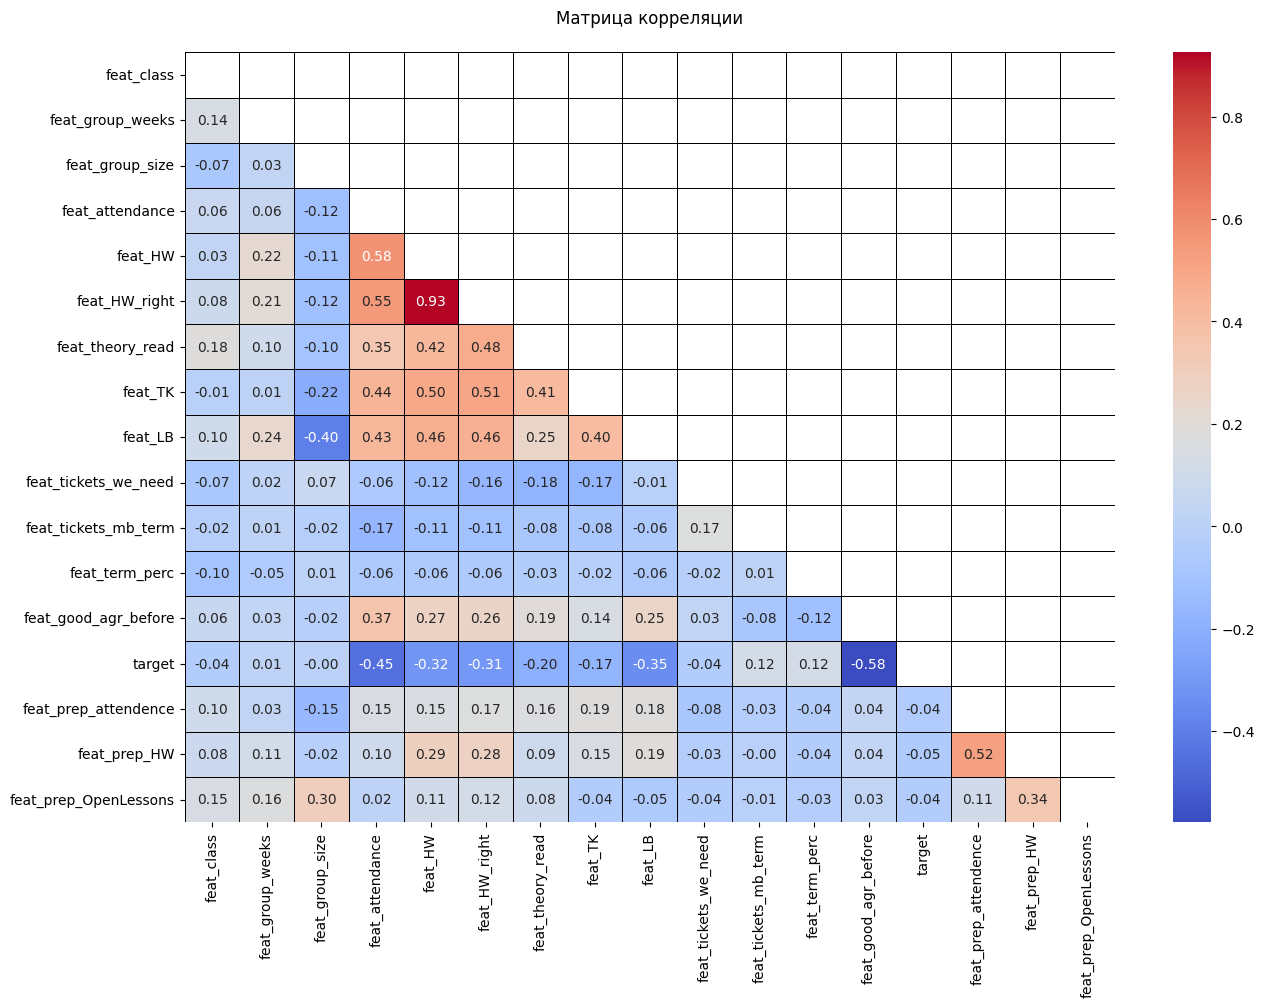

In [47]:
mask=np.triu(np.ones_like(df_numerical_corr,dtype=bool)) # создаем маску, чтобы отбросить все, что выше главной диагонали
plt.figure(figsize=(15, 10))
sns.heatmap(df_numerical_corr, mask=mask, annot=True , cmap='coolwarm', fmt='.2f', linewidths=0.5, linecolor='black')
# Основные параметры sns.heatmap:
# data: 2D массив, DataFrame или таблица данных, которые будут отображены на тепловой карте.
# annot: Если True, то на каждой ячейке будут отображены числовые значения.
# fmt: Формат отображения чисел (например, ".2f" для двух знаков после запятой).
# cmap: Цветовая карта (например, "viridis", "coolwarm", "YlOrRd" и т.д.).
# vmin, vmax: Минимальное и максимальное значения для шкалы цветов.
# linewidths: Ширина линий между ячейками.
# linecolor: Цвет линий между ячейками.
# cbar: Если True, отображается цветовая шкала (colorbar).
# xticklabels, yticklabels: Подписи для осей X и Y (можно передать список или True/False для автоматического отображения).
plt.title('Матрица корреляции\n')
plt.show()